## 1. Loading the dataset

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the pre-processed dataset
path="/content/preprocessed_loan_data.csv"
data = pd.read_csv(path)

In [4]:
# looking at the first five rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [5]:
# checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
data.shape

(614, 13)

In [7]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [8]:
# looking at the shape of the data
data.shape

(614, 12)

In [9]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [10]:
# shape of independent and dependent variables #loan status column
X.shape, y.shape

((614, 11), (614,))

## 2. Creating training and validation set

In [107]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set
#stratify data- X=all columns except loanstatus,Y=loanstatus

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],test_size=0.2)

In [108]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

## 3.Testing the accuracy of the model with various algorithms


In [109]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train.values,y_train)


LogisticRegression()

In [110]:
accLR=model1.score(X_test,y_test)*100
print("Accuracy:",accLR)

Accuracy: 79.67479674796748


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [111]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(X_train.values,y_train)

KNeighborsClassifier()

In [112]:
accKN=model2.score(X_test,y_test)*100
print("Accuracy:",accKN)

Accuracy: 78.86178861788618


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [113]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train.values,y_train)

RandomForestClassifier()

In [114]:
accRF=model3.score(X_test,y_test)*100
print("Accuracy:",accRF)

Accuracy: 76.42276422764228


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [115]:
from sklearn import svm
model4=svm.SVC()
model4.fit(X_train.values,y_train)

SVC()

In [116]:
accSVC=model3.score(X_test,y_test)*100
print("Accuracy:",accSVC)

Accuracy: 76.42276422764228


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [117]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier()
model5.fit(X_train.values,y_train)

DecisionTreeClassifier()

In [118]:
accDT=model4.score(X_test,y_test)*100
print("Accuracy:",accDT)

Accuracy: 79.67479674796748


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [119]:
algo=['LogisticRegression','KNeighbors','RandomForest','SVC','DecisionTree']
accuracy=[accLR,accKN,accRF,accSVC,accDT]
compare=pd.DataFrame({'Model':algo,'Accuracy':accuracy},index=[i for i in range(1,6)])
compare.T

,1,2,3,4,5
Model,LogisticRegression,KNeighbors,RandomForest,SVC,DecisionTree
Accuracy,79.674797,78.861789,76.422764,76.422764,79.674797


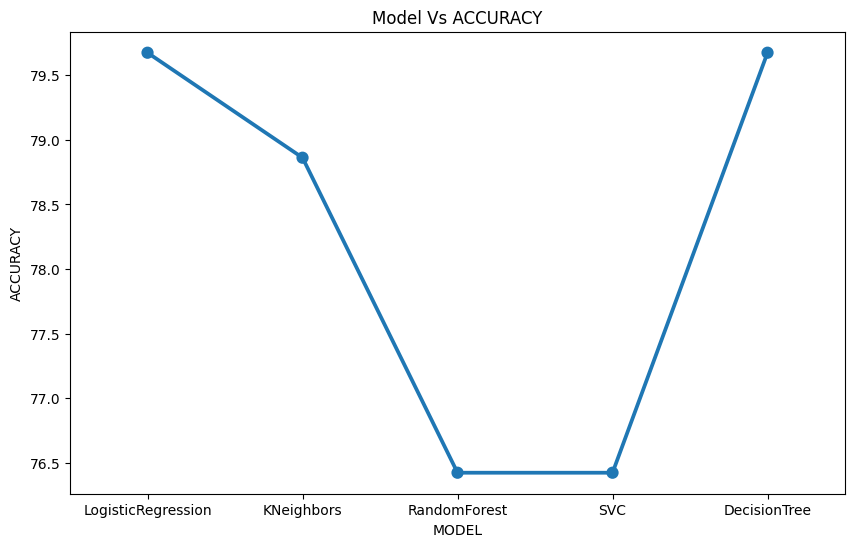

In [120]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.pointplot(x='Model',y='Accuracy',data=compare)
plt.title('Model Vs ACCURACY')
plt.xlabel('MODEL')
plt.ylabel('ACCURACY')
plt.show()

In [121]:
a=model5.predict([[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0]])
if a!=0:
  print("loan approved")
else:
  print("loan rejected")

loan approved


In [122]:
a=model5.predict([[0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0]])
if a!=0:
  print("loan approved")
else:
  print("loan rejected")

loan rejected


In [123]:
a=model3.predict([[0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0]])
if a!=0:
  print("loan approved")
else:
  print("loan rejected")

loan rejected


In [124]:
a=model4.predict([[1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,.0]])
if a!=0:
  print("loan approved")
else:
  print("loan rejected")

loan rejected
